## Import necessary libraries



In [1]:
!pip install wordcloud

In [15]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns





# Load the dataset  
# Display dataset information  
# Show the first 5 rows of the dataset  


In [7]:
# Load dataset
file_path = "C:/Users/ASUS/OneDrive/Desktop/ironhacklab/week_four/day3-4/NLP_project/data/data.csv"


df = pd.read_csv(file_path)

# Display dataset info
print("Dataset Information:")
print(df.info())

# Show first 5 rows
print("/nSample Data:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39942 entries, 0 to 39941
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    39942 non-null  int64 
 1   title    39942 non-null  object
 2   text     39942 non-null  object
 3   subject  39942 non-null  object
 4   date     39942 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB
None
/nSample Data:
   label                                              title  \
0      1  As U.S. budget fight looms, Republicans flip t...   
1      1  U.S. military to accept transgender recruits o...   
2      1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3      1  FBI Russia probe helped by Australian diplomat...   
4      1  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters)

# explor the data lable

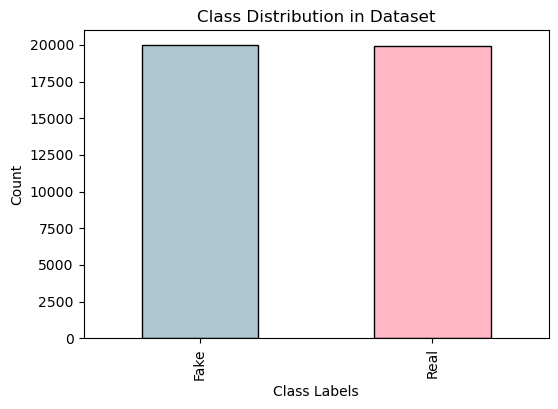

In [8]:

# Rename labels from 0 → "Fake" and 1 → "Real"
class_counts = df['label'].value_counts()
class_counts.index = ["Fake", "Real"]
# Define pastel colors
pastel_colors = ["#AEC6CF", "#FFB7C5"]  # Light blue & light pink
# Plot the bar chart with pastel colors
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=pastel_colors, edgecolor="black")
# Add labels and title
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution in Dataset")
# Show the plot
plt.show()

# Generate and visualize the Word Cloud for real label

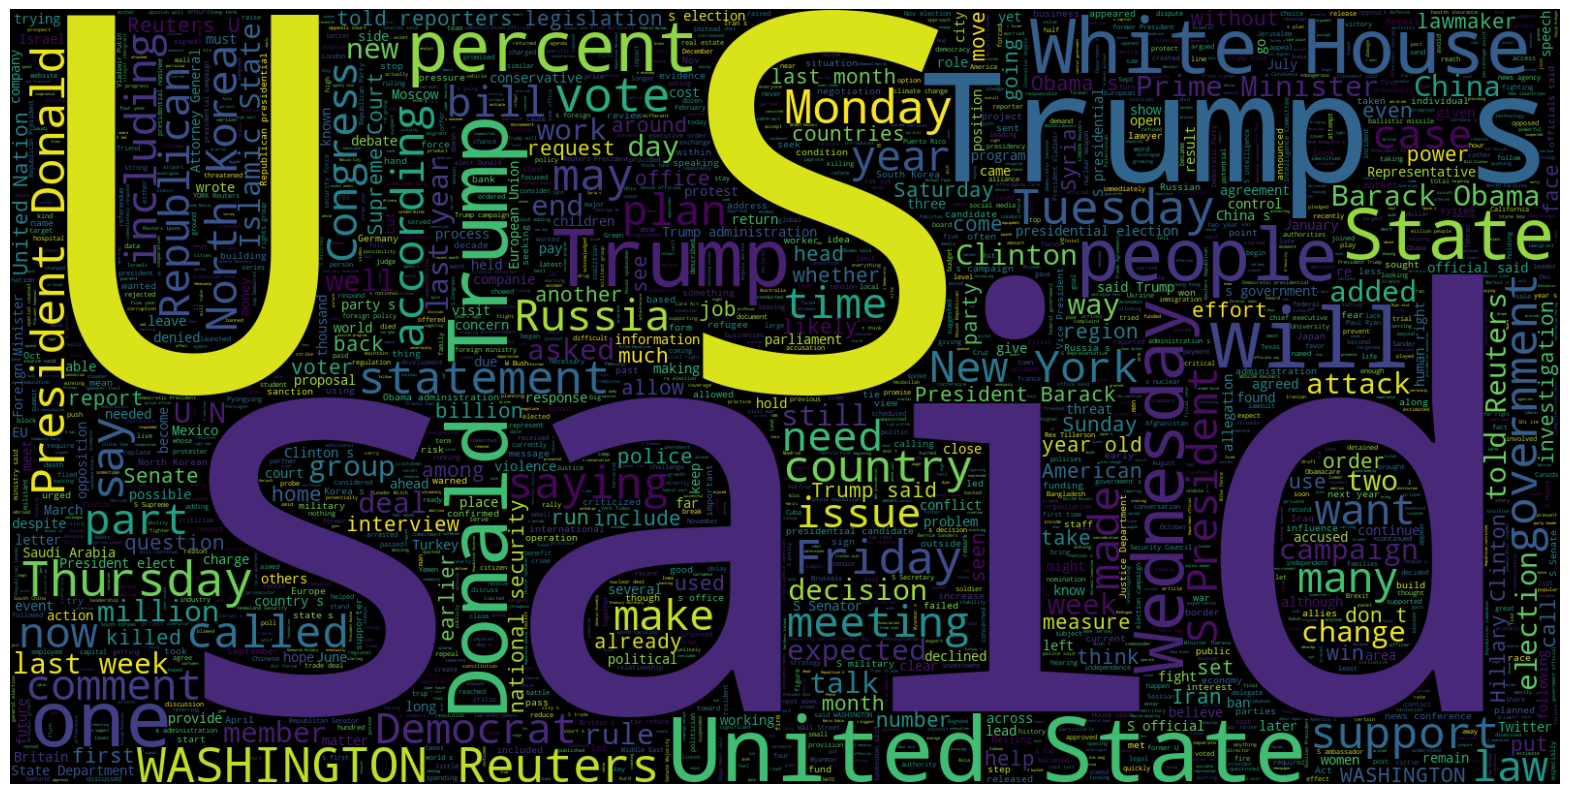

In [9]:


# Define stop words
custom_stopwords = set(STOPWORDS)

# Create a word cloud for text where label == 0
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=custom_stopwords).generate(" ".join(df[df.label == 1].text))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.show()

# Generate and visualize the Word Cloud for fake label

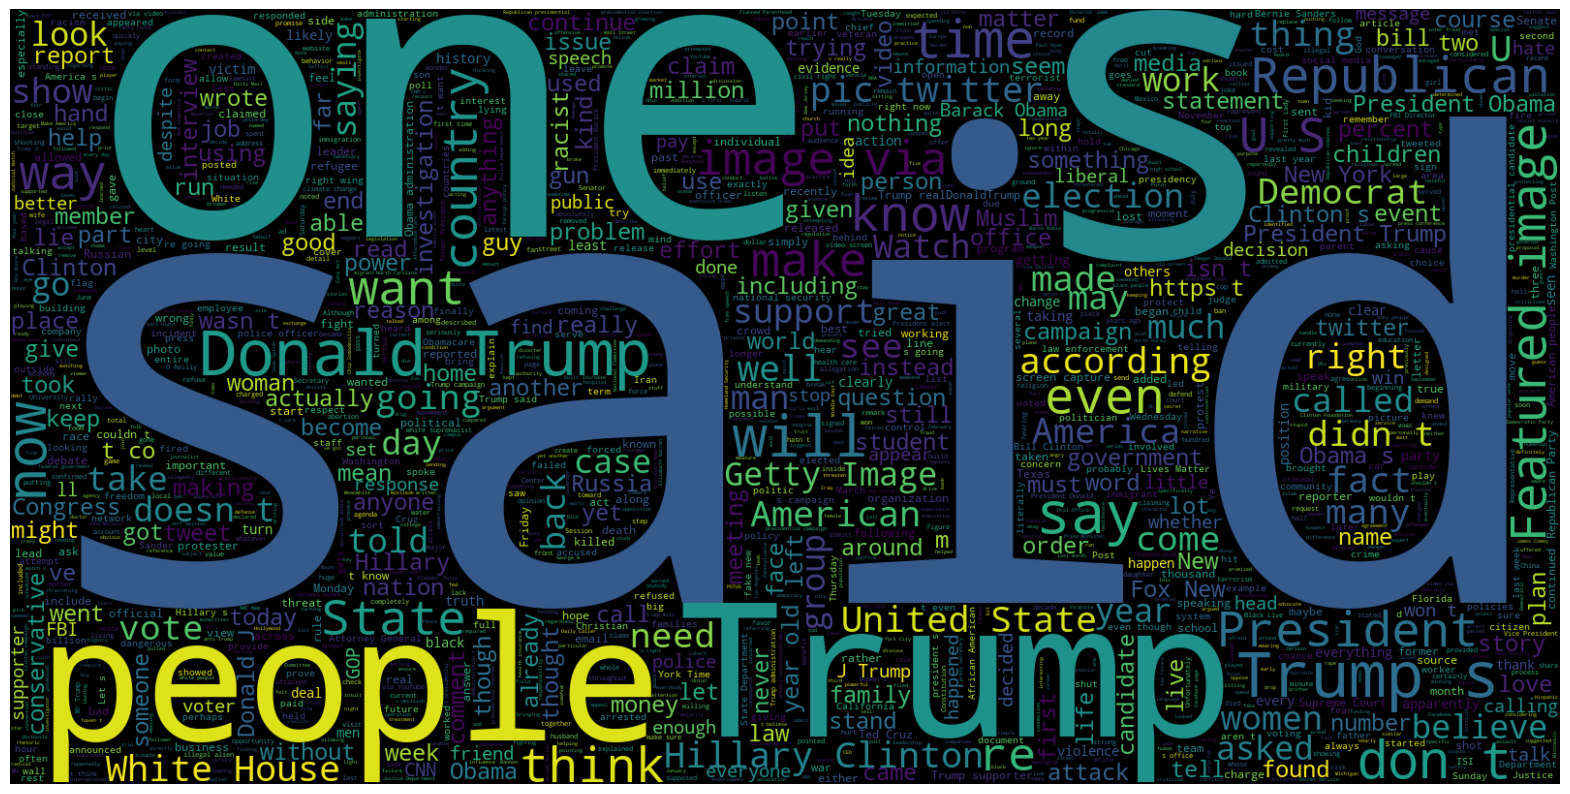

In [10]:


# Define stop words
custom_stopwords = set(STOPWORDS)

# Create a word cloud for text where label == 0
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=custom_stopwords).generate(" ".join(df[df.label == 0].text))

# Display the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.show()

## Data Cleaning and Preprocess


In [11]:


# Function to clean text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'/[.*?/]', '', text)  # Remove text in brackets
    text = re.sub(r'http/S+', '', text)  # Remove URLs
    text = re.sub(r'/w*/d/w*', '', text)  # Remove words containing numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Apply text cleaning
df['text'] = df['text'].apply(clean_text)

# Drop unnecessary columns
df = df.drop(columns=['date', 'subject'])

# Display processed data
print("Processed Data Sample:")
print(df.head())


Processed Data Sample:
   label                                              title  \
0      1  As U.S. budget fight looms, Republicans flip t...   
1      1  U.S. military to accept transgender recruits o...   
2      1  Senior U.S. Republican senator: 'Let Mr. Muell...   
3      1  FBI Russia probe helped by Australian diplomat...   
4      1  Trump wants Postal Service to charge 'much mor...   

                                                text  
0  washington reuters  the head of a conservative...  
1  washington reuters  transgender people will be...  
2  washington reuters  the special counsel invest...  
3  washington reuters  trump campaign adviser geo...  
4  seattlewashington reuters  president donald tr...  


## Split the dataset into training and testing sets

In [12]:


# Define features (X) and target (y)
X = df['text']
y = df['label']

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 31953
Testing samples: 7989


# Convert text data into numerical representation using TF-IDF  


In [16]:

# Convert text into numerical representation using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Keep only 5000 most common words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Shape of TF-IDF Train Data: {X_train_tfidf.shape}")
print(f"Shape of TF-IDF Test Data: {X_test_tfidf.shape}")


Shape of TF-IDF Train Data: (31953, 5000)
Shape of TF-IDF Test Data: (7989, 5000)


# Load and initialize machine learning models  


In [17]:

# Define models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear')
}

# Train and evaluate each model
results = {}
conf_matrices = {}

for model_name, model in models.items():
    print(f"/nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    # Store accuracy and confusion matrix
    results[model_name] = accuracy_score(y_test, y_pred)
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred)

    # Display results
    print(f"{model_name} Accuracy: {results[model_name]:.4f}")
    print("Classification Report:/n", classification_report(y_test, y_pred))


/nTraining Logistic Regression...
Logistic Regression Accuracy: 0.9857
Classification Report:/n               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3996
           1       0.98      0.99      0.99      3993

    accuracy                           0.99      7989
   macro avg       0.99      0.99      0.99      7989
weighted avg       0.99      0.99      0.99      7989

/nTraining Naïve Bayes...
Naïve Bayes Accuracy: 0.9105
Classification Report:/n               precision    recall  f1-score   support

           0       0.92      0.90      0.91      3996
           1       0.90      0.92      0.91      3993

    accuracy                           0.91      7989
   macro avg       0.91      0.91      0.91      7989
weighted avg       0.91      0.91      0.91      7989

/nTraining Random Forest...
Random Forest Accuracy: 0.9969
Classification Report:/n               precision    recall  f1-score   support

           0       1.00      1.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_320\2874538422.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="Blues")


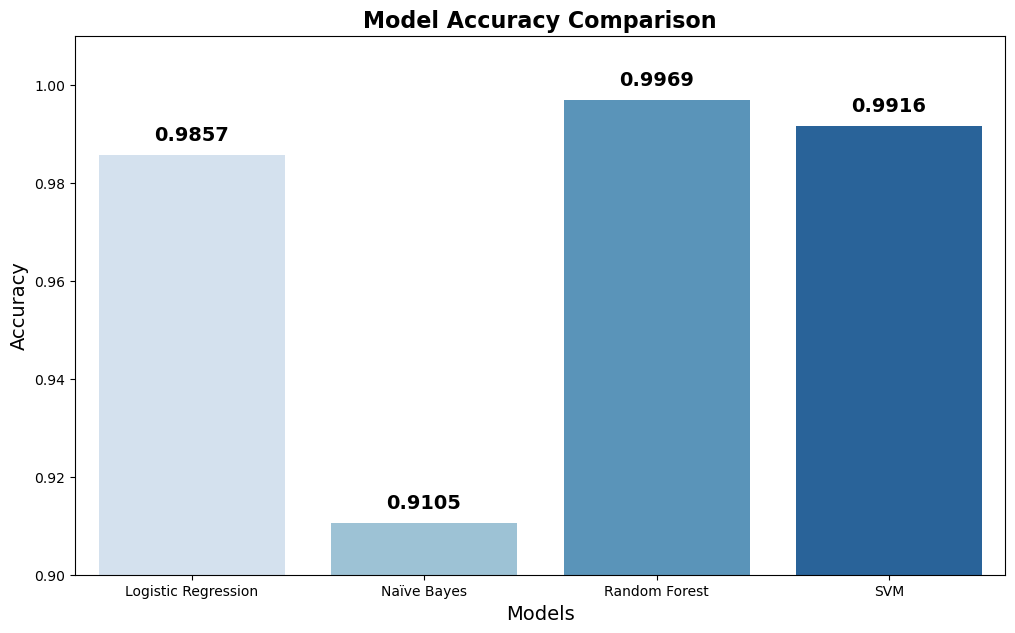

In [18]:

# Model names and their corresponding accuracy scores
models = ["Logistic Regression", "Naïve Bayes", "Random Forest", "SVM"]
accuracies = [0.9857, 0.9105, 0.9969, 0.9916]
# Set a pastel color palette
sns.set_palette("pastel")
# Create a larger bar plot
plt.figure(figsize=(12, 7))  # Increased figure size
sns.barplot(x=models, y=accuracies, palette="Blues")
# Add data labels with larger font size and better positioning
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.003, f"{acc:.4f}", ha='center', fontsize=14, fontweight='bold')
# Titles and labels with larger fonts
plt.title("Model Accuracy Comparison", fontsize=16, fontweight='bold')
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0.9, 1.01)  # Adjusted y-axis for better spacing
# Show the plot
plt.show()

# Compute and visualize the Confusion Matrix  


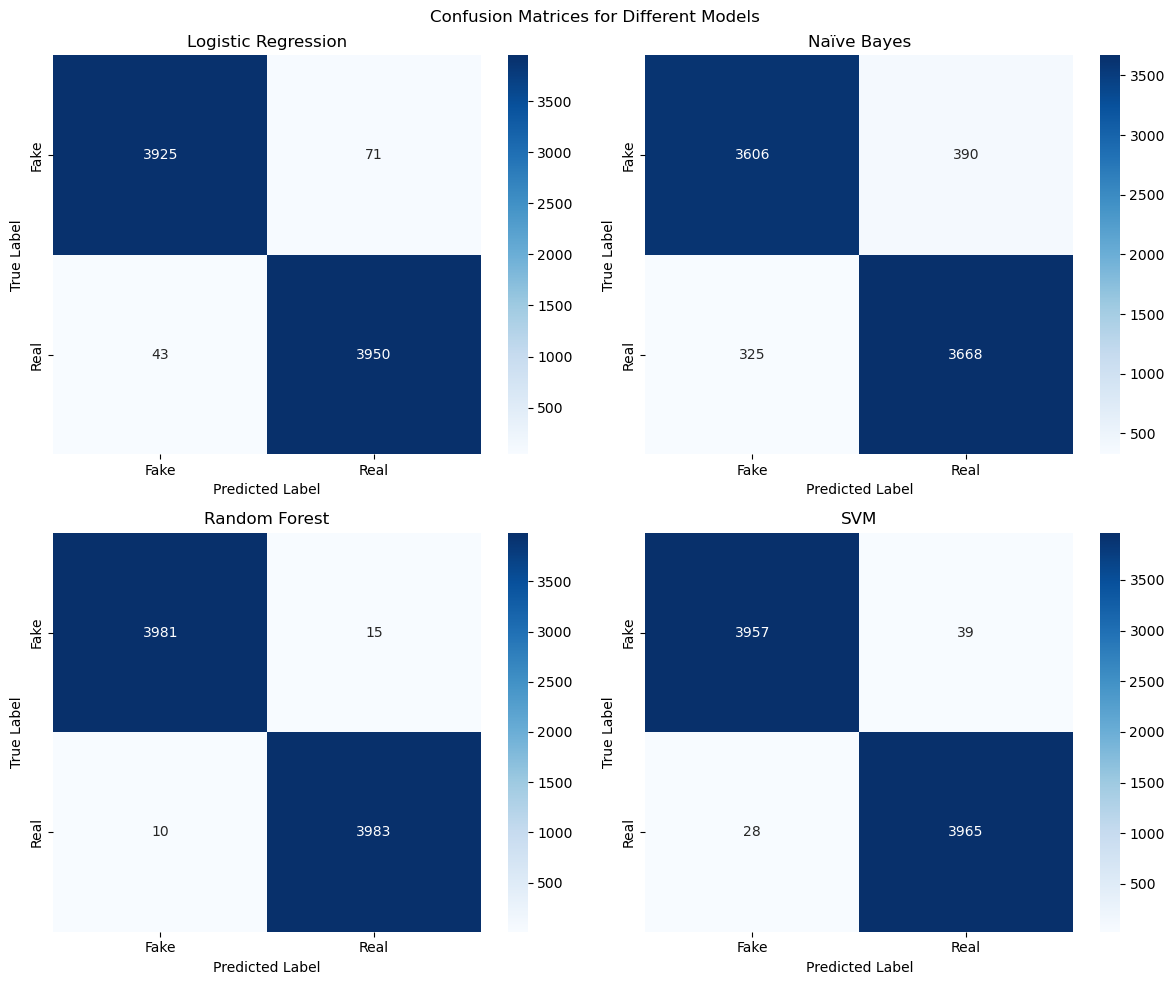

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Confusion Matrices for Different Models")
for i, (model_name, cm) in enumerate(conf_matrices.items()):
    class_labels = ["Fake", "Real"]
    ax = axes[i // 2, i % 2]
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_xticklabels(class_labels)
    ax.set_yticklabels(class_labels)
plt.tight_layout()
plt.show()

In [20]:
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=42)

# Load the real dataset 


In [21]:
# Load validation dataset
validation_path = "C:/Users/ASUS/OneDrive/Desktop/ironhacklab/week_four/day3-4/NLP_project/data/validation_data.csv"

validation_df = pd.read_csv(validation_path)

# Display sample data
print("Validation Data Sample:")
print(validation_df.head())


Validation Data Sample:
   label                                              title  \
0      1  UK's May 'receiving regular updates' on London...   
1      1  UK transport police leading investigation of L...   
2      1  Pacific nations crack down on North Korean shi...   
3      1  Three suspected al Qaeda militants killed in Y...   
4      1  Chinese academics prod Beijing to consider Nor...   

                                                text    subject  \
0  london reuters  british prime minister theresa...  worldnews   
1  london reuters  british counterterrorism polic...  worldnews   
2  wellington reuters  south pacific island natio...  worldnews   
3  aden yemen reuters  three suspected al qaeda m...  worldnews   
4  beijing reuters  chinese academics are publicl...  worldnews   

                  date  
0  September 15, 2017   
1  September 15, 2017   
2  September 15, 2017   
3  September 15, 2017   
4  September 15, 2017   


# Data Cleaning and  Preprocessing


In [22]:
# Apply text cleaning function
validation_df['text'] = validation_df['text'].apply(clean_text)

# Transform text using the same TF-IDF vectorizer
X_validation_tfidf = vectorizer.transform(validation_df['text'])

# Display transformed shape
print(f"Shape of TF-IDF Validation Data: {X_validation_tfidf.shape}")


Shape of TF-IDF Validation Data: (4956, 5000)


# predict the real labels for the real data

In [23]:
# Predict labels
validation_predictions = rf.predict(X_validation_tfidf)

# Replace label 2 with predicted values
validation_df['label'] = validation_predictions

# Display updated data
print("Updated Validation Data Sample:")
print(validation_df.head())


Updated Validation Data Sample:
   label                                              title  \
0      1  UK's May 'receiving regular updates' on London...   
1      1  UK transport police leading investigation of L...   
2      1  Pacific nations crack down on North Korean shi...   
3      1  Three suspected al Qaeda militants killed in Y...   
4      1  Chinese academics prod Beijing to consider Nor...   

                                                text    subject  \
0  london reuters  british prime minister theresa...  worldnews   
1  london reuters  british counterterrorism polic...  worldnews   
2  wellington reuters  south pacific island natio...  worldnews   
3  aden yemen reuters  three suspected al qaeda m...  worldnews   
4  beijing reuters  chinese academics are publicl...  worldnews   

                  date  
0  September 15, 2017   
1  September 15, 2017   
2  September 15, 2017   
3  September 15, 2017   
4  September 15, 2017   


# Save predictions to a new CSV file


In [24]:
# Save predictions to a new CSV file
output_path = "C:/Users/ASUS/OneDrive/Desktop/ironhacklab/week_four/day3-4/NLP_project/data/validation_data.csv"
validation_df.to_csv(output_path, index=False)

print(f"Predictions saved successfully to {output_path}")


Predictions saved successfully to C:/Users/ASUS/OneDrive/Desktop/ironhacklab/week_four/day3-4/NLP_project/data/validation_data.csv
